**About JB Music**
Link To Website: [here](https://www.jbmusictherapy.com/)

JB Music Therapy is a team of Certified Music Therapists who collaborate, design, and personalize therapy with their clients that will foster desired change: boost mood, decrease stress, strengthen relationships, increase focus, develop learning, reduce anxiety, rehab after an injury, and recover lost memories. JB Music Therapy is the largest employer of Music Therapists in Canada. 

**JB Music: Primary Services**
The core services they offer are;
- Individual therapy 
- Group programs
- Public Education

**Project Background**
For this project, a survey was conducted to assess the impact of music on people's mental health and mood in general. 

The survey recorded responses from over 700 participants and includes details like musical preferences, listening habits, and overall state of mind. Respondents were given 16 genres of music for which they ranked the frequency of listening to each. The responses ranged from never, to very frequently.

Moreover, the respondents also ranked the intensity of their feelings of anxiety, depression, insomnia, and OCD on a scale of 1 to 10. 0 being the lowest in intensity to 10 being the highest. 

Finally, you may look at additional data that does not fall in these blocks, however, it may still provide useful background information. 


# **Objectives.**

1. Data Cleaning and Processing: Clean and prepare the data for analysis.

2. Data Visualization: Visualize the data to make it easy to understand.

3. Data Reporting: Use the insights and correlations within the data to make recommendations.

4. Build a  machine learning algorithm to model the relationship between mental health and musical preferences.

### **Libraries to be used.**

In [ ]:
# For data cleaning and analysis 
import pandas as pd
import numpy as np
import missingno as mn

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

# **Data Cleaning.**

In [ ]:
#Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/CarolOpiyo/opiyo-music-and-therapy-/main/Music-and-Therapy-survey-1.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
# observe the dimension of our datasets. Shows the number of rows and columns
print("Shape:", df.shape)

Shape: (736, 33)


The data set has 736 rows and 33 columns.

In [ ]:
# print the column names
print(df.columns)

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


In [ ]:
# print summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [ ]:
# print summary statistics of the DataFrame
print(df.describe())

              Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000  


In [ ]:
# Checking for duplicates.
df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


In [ ]:
#Checking for missing values
if df.isnull().any().any():
    print("There are missing values in the dataframe.")
else:
    print("There are no missing values in the dataframe.")


There are missing values in the dataframe.


In [ ]:
#Specific columns with missing values
missing_cols = [col for col in df.columns if df[col].isnull().any()]
for col in missing_cols:
    print(f'{col} has {df[col].isnull().sum()} missing value(s).')
print(missing_cols)

Age has 1 missing value(s).
Primary streaming service has 1 missing value(s).
While working has 3 missing value(s).
Instrumentalist has 4 missing value(s).
Composer has 1 missing value(s).
Foreign languages has 4 missing value(s).
BPM has 107 missing value(s).
Music effects has 8 missing value(s).
['Age', 'Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Foreign languages', 'BPM', 'Music effects']


### **Dealing with the missing values.**

For the age column we notice that it was a human error while doing data entry so we can write it correctly.

It was input as 23:04 instead of 23.

In [ ]:
#We use the fillna method to rectify the error.
df['Age'] = df['Age'].fillna(value=23)


In [ ]:
#Checking the most used stresming service
print(df['Primary streaming service'].mode())

0    Spotify
dtype: object


From the above we can see that spotify is the most preffered and we can fill the missing value using that.

In [ ]:
#We use the fillna method to rectify the error.
df['Primary streaming service'] = df['Primary streaming service'].fillna(value=df['Primary streaming service'].mode()[0])


In [ ]:
#We use the fillna method to rectify the error.
df['While working'] = df['While working'].fillna(value=df['While working'].mode()[0])

In [ ]:
#We use the fillna method to rectify the error.
df['Instrumentalist'] = df['Instrumentalist'].fillna(value=df['Instrumentalist'].mode()[0])

In [ ]:
#We use the fillna method to rectify the error.
df['Composer'] = df['Composer'].fillna(value=df['Composer'].mode()[0])

In [ ]:
#We use the fillna method to rectify the error.
df['Foreign languages'] = df['Foreign languages'].fillna(value=df['Foreign languages'].mode()[0])

In [ ]:
#Checking the best between the mode and median 
print(df['BPM'].median())
print(df['BPM'].mode())

120.0
0    120.0
dtype: float64


We can see that BPM, the mode and median are the same. So we can use either.

In [ ]:
#We use the fillna method to rectify the error.
df['BPM'] = df['BPM'].fillna(value=df['BPM'].mode()[0])

In [ ]:
#We use the fillna method to rectify the error.
df['Music effects'] = df['Music effects'].fillna(value=df['Music effects'].mode()[0])


In [ ]:
#We confirm if the dataset now has no missing values
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

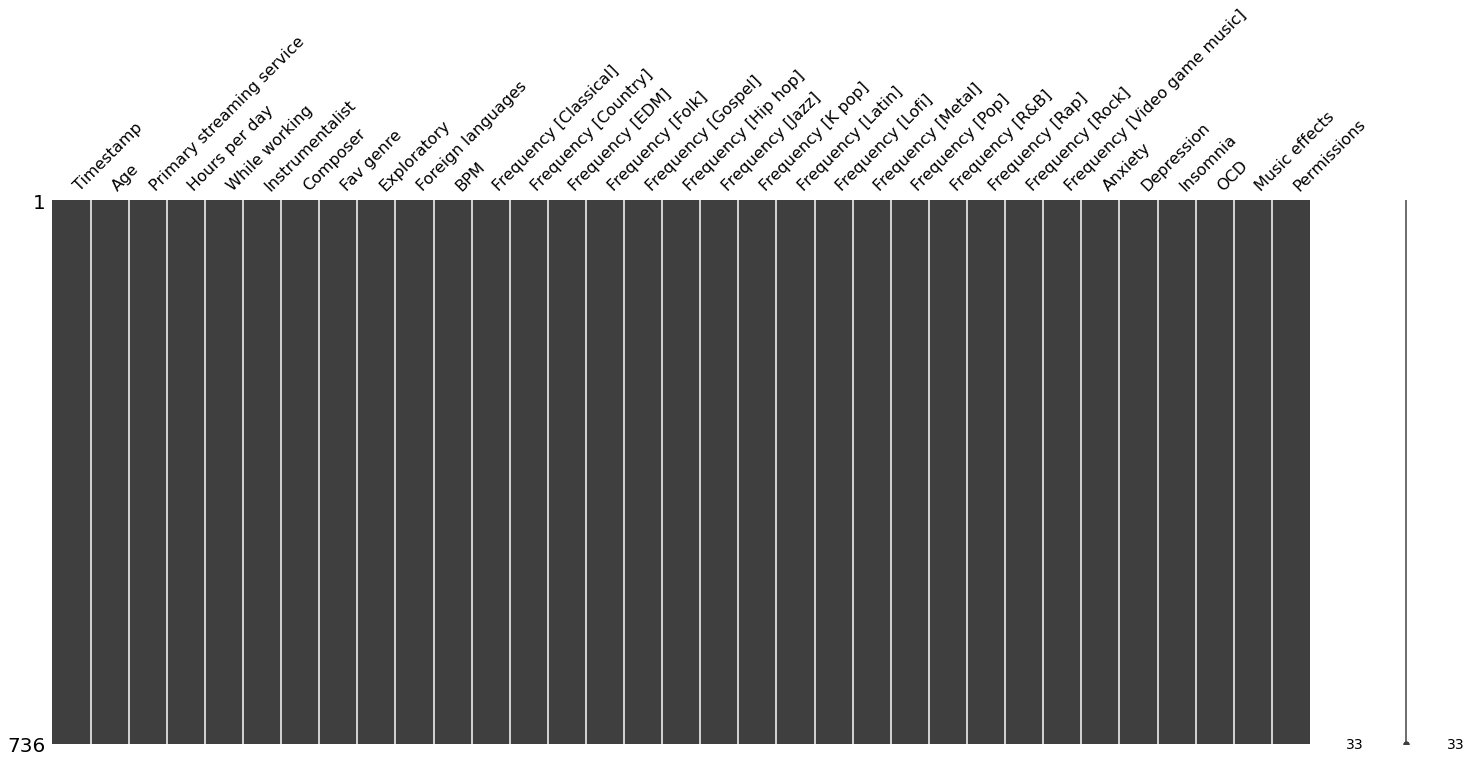

In [ ]:
#We can also check for missing values like this
mn.matrix(df);

We notice that all the missing values have been dealt with.

### **Checking for outliers**

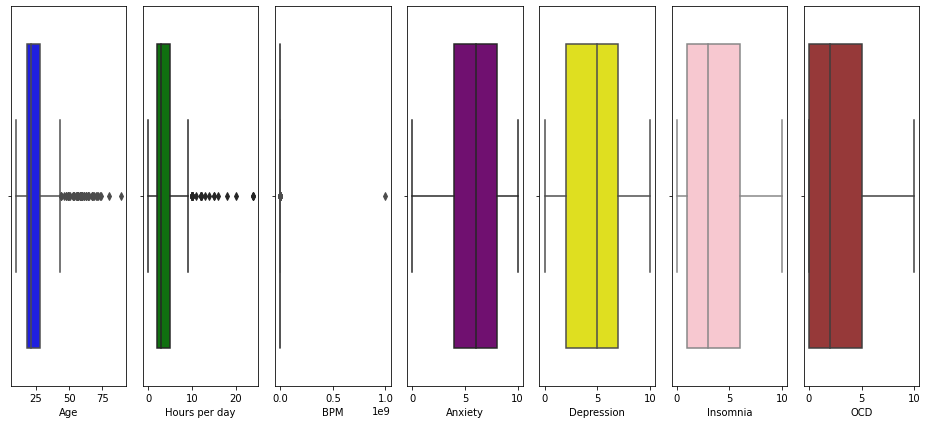

In [ ]:
# Create a figure with 1 row and 6 columns
f, axes = plt.subplots(1, 7, figsize=(13, 6))

# Create a box plot for Age
sns.boxplot(data=df, x="Age", color='blue', ax=axes[0])

# Create a box plot for Hours per day
sns.boxplot(data=df, x="Hours per day", color='green', ax=axes[1])

# Create a box plot for BPM
sns.boxplot(data=df, x="BPM", color='red', ax=axes[2])

# Create a box plot for Anxiety
sns.boxplot(data=df, x="Anxiety", color='purple', ax=axes[3])

# Create a box plot for Depression
sns.boxplot(data=df, x="Depression", color='yellow', ax=axes[4])

# Create a box plot for Insomnia
sns.boxplot(data=df, x="Insomnia", color='pink', ax=axes[5])

# Create a box plot for OCD
sns.boxplot(data=df, x="OCD", color='brown', ax=axes[6])


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


We notice that Anxiety, Depression, Insomnia, OCD columns have no outliers.

In the column age, we have a broad range of individuals with different ages, that is why we notice some outliers.

Hours per day, some people listen to music more than others.

BPM, the blood pressure level varies for each individual.

Thus we can say our data is now okay, and we can proceed to analysis.

# **Exploratory Data Analysis.**

### **Age distribution on the Data.**

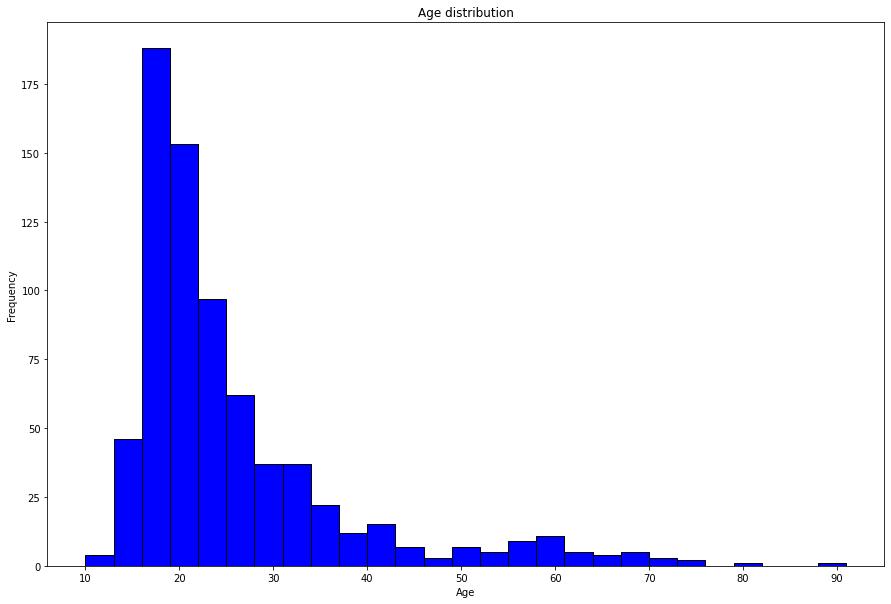

In [ ]:
df['Age'] = df['Age'].astype(int)
plt.figure(figsize=(15, 10))
plt.hist(df['Age'], bins=range(min(df['Age']), max(df['Age']) + 3, 3), color='blue', edgecolor='black')
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


We notice that people aged 18-20 form the larger part of this dataset.

### **What is the relationship between the frequency of listening to music and scores for anxiety, depression, insomnia, and OCD?**

In [ ]:
# Select the columns of interest
df_selected = df[['Frequency [Classical]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]

# Plot the relationship using scatter plot
fig = px.scatter(df_selected, x='Frequency [Classical]', y='Anxiety', color='Anxiety',
                 title='Relationship between Frequency of Listening to Music and Mental Health Scores')

# Add scatter plot for depression
fig.add_scatter(x=df_selected['Frequency [Classical]'], y=df_selected['Depression'],
                name='Depression', mode='markers', marker=dict(color='purple'))

# Add scatter plot for insomnia
fig.add_scatter(x=df_selected['Frequency [Classical]'], y=df_selected['Insomnia'],
                name='Insomnia', mode='markers', marker=dict(color='red'))

# Add scatter plot for OCD
fig.add_scatter(x=df_selected['Frequency [Classical]'], y=df_selected['OCD'],
                name='OCD', mode='markers', marker=dict(color='blue'))

# Show the plot
fig.show()


### **Is there a correlation between the age of the participants and their scores for anxiety, depression, insomnia, and OCD?**

In [ ]:
fig = px.scatter(df, x='Age', y='Anxiety', title='Relationship between Age and Anxiety Score')
fig.show()

fig = px.scatter(df, x='Age', y='Depression', title='Relationship between Age and Depression Score')
fig.show()

fig = px.scatter(df, x='Age', y='Insomnia', title='Relationship between Age and Insomnia Score')
fig.show()

fig = px.scatter(df, x='Age', y='OCD', title='Relationship between Age and OCD Score')
fig.show()


### **Correlation Matrix between Age and Mental Health Scores.**

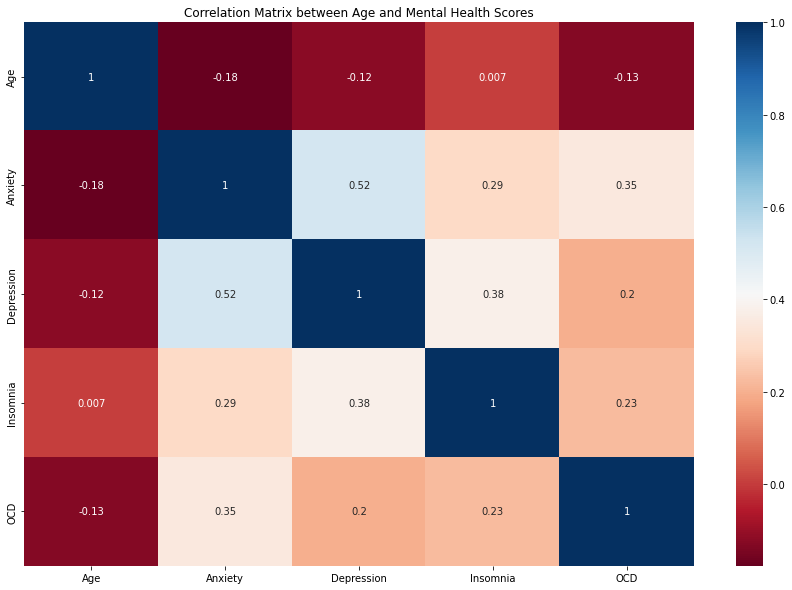

In [ ]:
# Create a correlation matrix between the variables of interest
corr = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='RdBu')

# Add the title to the plot
plt.title("Correlation Matrix between Age and Mental Health Scores")

# Show the plot
plt.show()

There is a weak negative correlation between age and mental health scores.

### **What is the most common primary streaming service used by participants?**

In [ ]:
most_common_streaming_service = df['Primary streaming service'].value_counts().idxmax()
print("The most common primary streaming service used by participants is: ", most_common_streaming_service)


The most common primary streaming service used by participants is:  Spotify


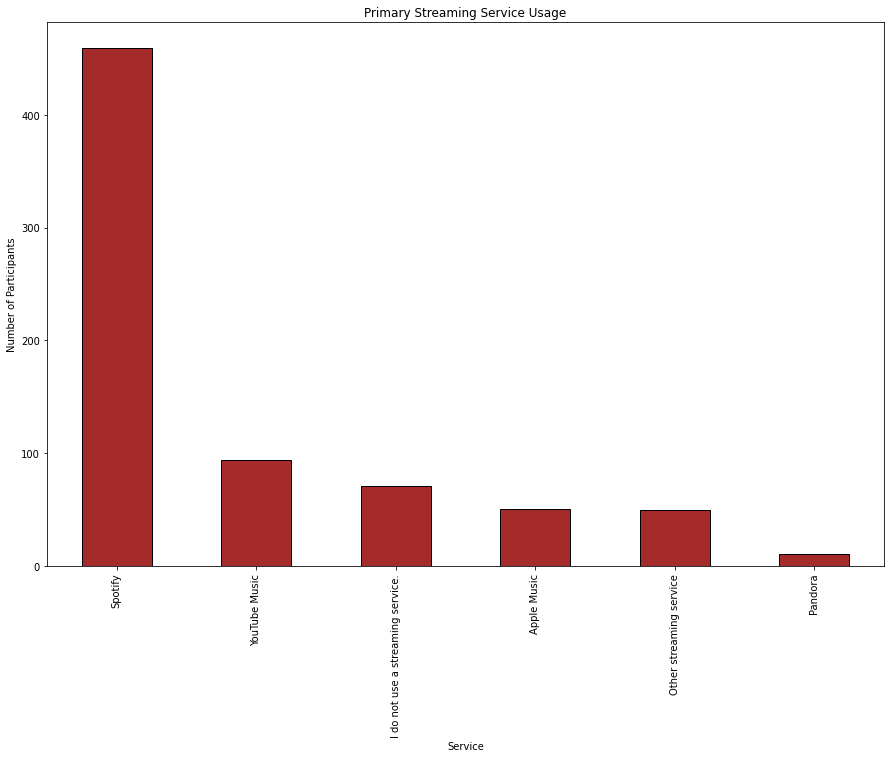

In [ ]:
# Count the number of occurrences of each primary streaming service
service_counts = df['Primary streaming service'].value_counts()

# Plot the results as a bar plot
plt.figure(figsize=(15, 10))
service_counts.plot(kind='bar', color='brown', edgecolor='black')
plt.title("Primary Streaming Service Usage")
plt.xlabel("Service")
plt.ylabel("Number of Participants")
plt.show()


The most common primary streaming service used by participants is:  Spotify.

### **Favourite Genre Distribution.**

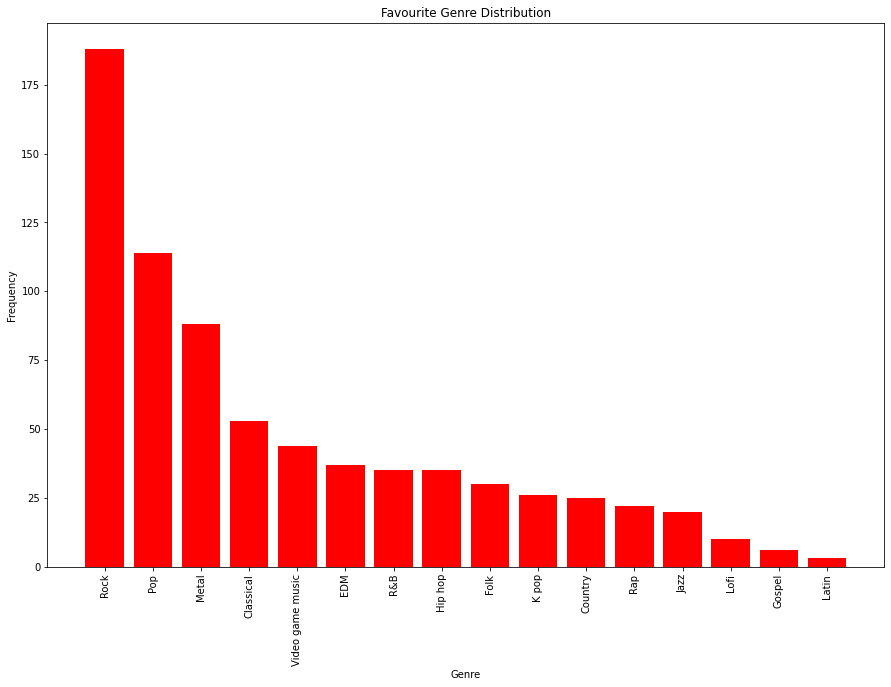

In [ ]:
# Count the frequency of each genre
genre_counts = df['Fav genre'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 10))
plt.bar(genre_counts.index, genre_counts.values, color='red')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Favourite Genre Distribution')
plt.xticks(rotation=90)
plt.show()

The favorite genre is rock music.

### **How many hours do participants listen to music per day, and does it vary by their working status?**

In [ ]:
# Calculate the average hours of music listening per day for working and non-working participants
working_mean = df[df['While working'] == 'Yes']['Hours per day'].mean()
non_working_mean = df[df['While working'] == 'No']['Hours per day'].mean()

# Create a dictionary to store the results
result = {'Working': working_mean, 'Non-working': non_working_mean}

# Convert the dictionary to a dataframe
result_df = pd.DataFrame.from_dict(result, orient='index', columns=['Hours per day'])

# Print the results
print(result_df)

             Hours per day
Working           4.009192
Non-working       1.923377


<Figure size 1440x720 with 0 Axes>

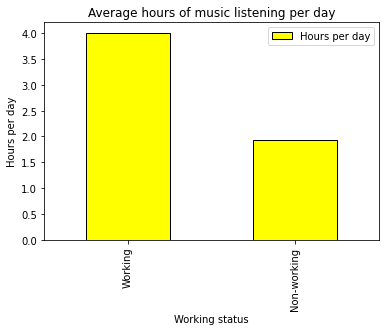

In [ ]:
# Plot the results
plt.figure(figsize=(20, 10))
result_df.plot(kind='bar', color='yellow', edgecolor='black')
plt.title("Average hours of music listening per day")
plt.xlabel("Working status")
plt.ylabel("Hours per day")
plt.show();

The participants listen to music mostly when working.

### **What is the distribution of participants based on their instrumentalist and composer status?**

In [ ]:
# Count the number of "yes" and "no" answers for instrumentalist
instrumentalist_counts = df['Instrumentalist'].value_counts()

# Count the number of "yes" and "no" answers for composer
composer_counts = df['Composer'].value_counts()

print("Instrumentalist counts:")
print(instrumentalist_counts)

print("Composer counts:")
print(composer_counts)

Instrumentalist counts:
No     501
Yes    235
Name: Instrumentalist, dtype: int64
Composer counts:
No     610
Yes    126
Name: Composer, dtype: int64


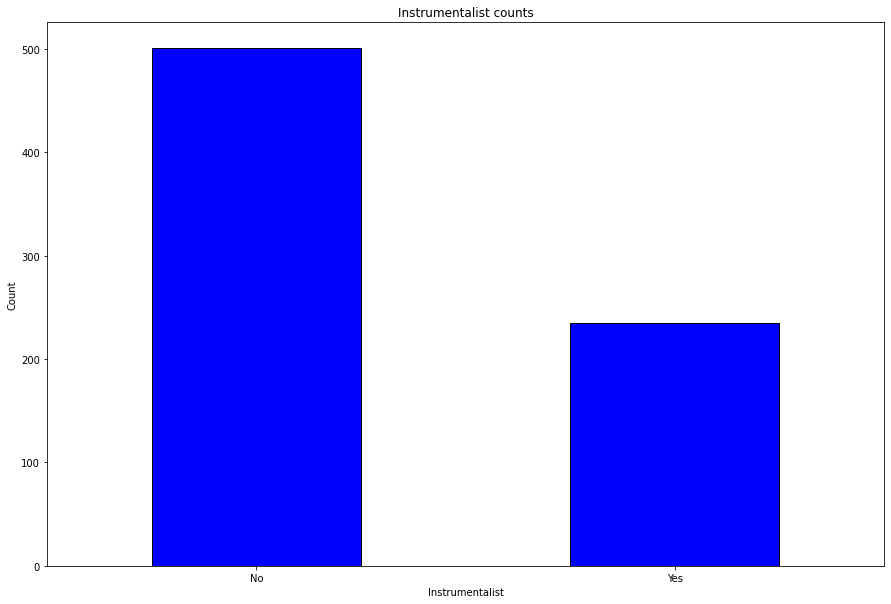

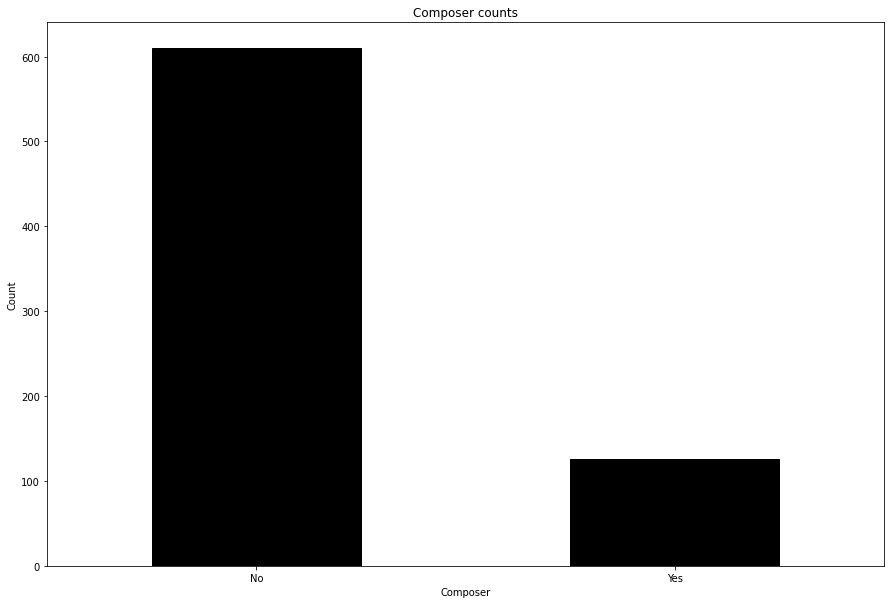

In [ ]:
# Plot the number of "yes" and "no" answers for instrumentalist
plt.figure(figsize=(15, 10))
instrumentalist_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Instrumentalist counts")
plt.xlabel("Instrumentalist")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Plot the number of "yes" and "no" answers for composer
plt.figure(figsize=(15, 10))
composer_counts.plot(kind='bar', color='black', edgecolor='black')
plt.title("Composer counts")
plt.xlabel("Composer")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### **Music Effect Distribution.**

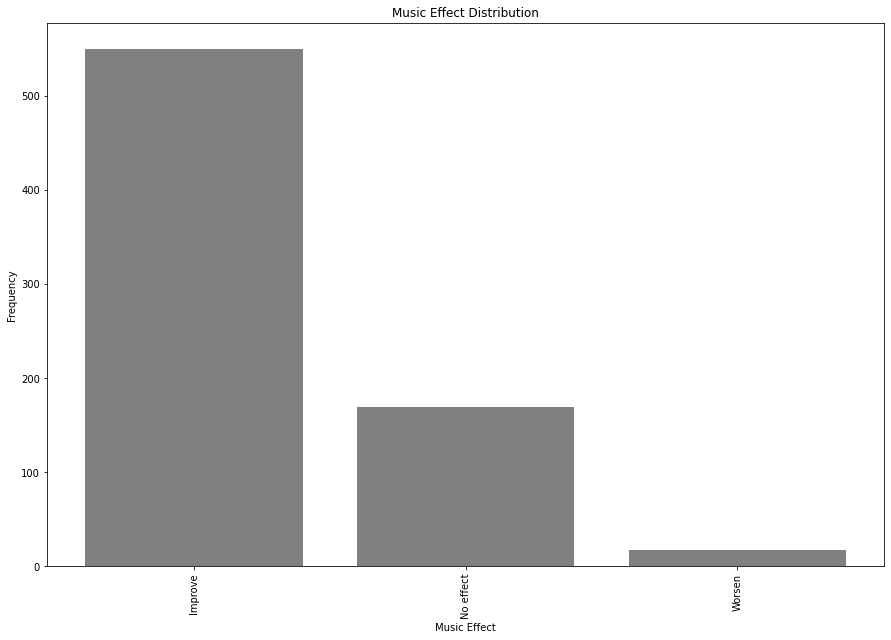

In [ ]:
# Count the frequency of each effect
effect_counts = df['Music effects'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 10))
plt.bar(effect_counts.index, effect_counts.values, color='grey')
plt.xlabel('Music Effect')
plt.ylabel('Frequency')
plt.title('Music Effect Distribution')
plt.xticks(rotation=90)
plt.show()

We see that music improves their moods.

### **Music effect and Fav Genre Vs Mental Health Scores.**

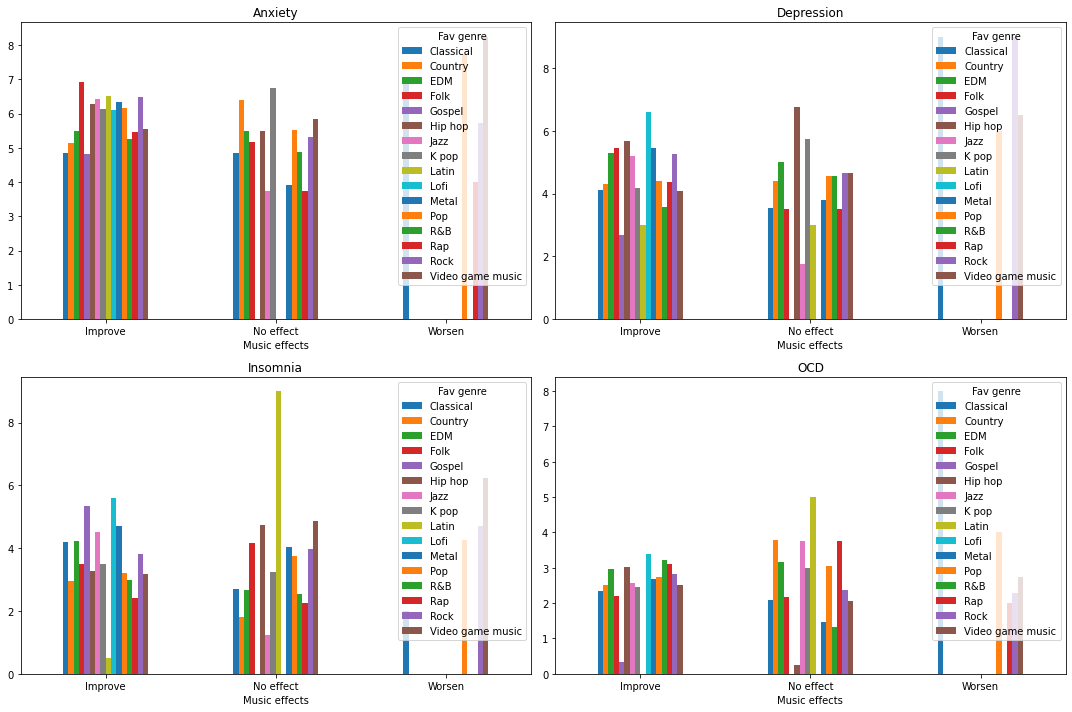

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.ravel()

df.groupby(["Music effects", "Fav genre"]).mean()["Anxiety"].unstack().plot(kind='bar', ax=ax[0], rot=0)
ax[0].set_title("Anxiety")

df.groupby(["Music effects", "Fav genre"]).mean()["Depression"].unstack().plot(kind='bar', ax=ax[1], rot=0)
ax[1].set_title("Depression")

df.groupby(["Music effects", "Fav genre"]).mean()["Insomnia"].unstack().plot(kind='bar', ax=ax[2], rot=0)
ax[2].set_title("Insomnia")

df.groupby(["Music effects", "Fav genre"]).mean()["OCD"].unstack().plot(kind='bar', ax=ax[3], rot=0)
ax[3].set_title("OCD")

fig.tight_layout()
plt.show()


This shows that participants in this dataset mostly suffer from anxiety.

### **Relationship between Frequency of Listening to Classical Music and Anxiety Score.**

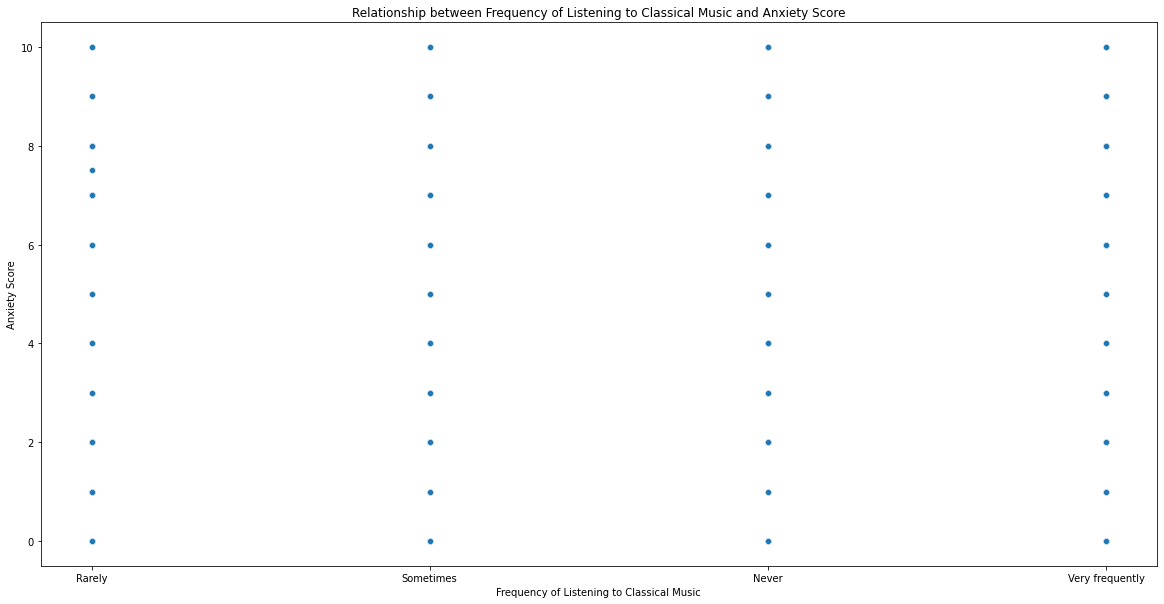

In [ ]:
# Plot the relationship between the frequency of listening to music and the scores for anxiety
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Frequency [Classical]', y='Anxiety', data=df)
plt.xlabel('Frequency of Listening to Classical Music')
plt.ylabel('Anxiety Score')
plt.title('Relationship between Frequency of Listening to Classical Music and Anxiety Score')
plt.show()

### **Relationship between Frequency of Listening to Classical Music and Depression Score.**

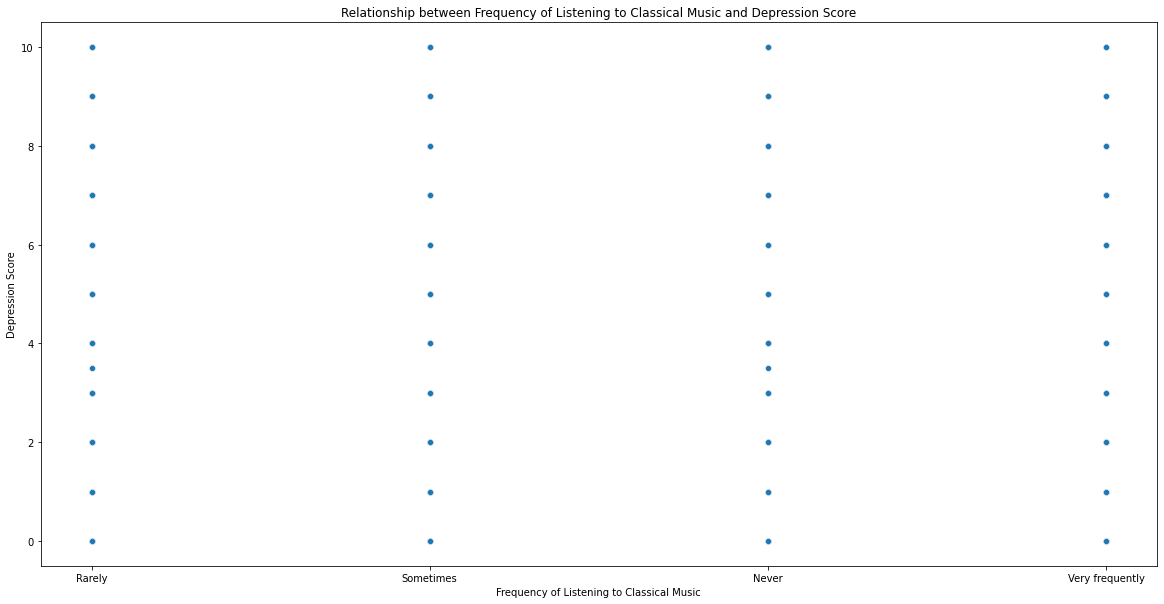

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Frequency [Classical]', y='Depression', data=df)
plt.xlabel('Frequency of Listening to Classical Music')
plt.ylabel('Depression Score')
plt.title('Relationship between Frequency of Listening to Classical Music and Depression Score')
plt.show()

### **Relationship between Frequency of Listening to Classical Music and Insomnia Score.**

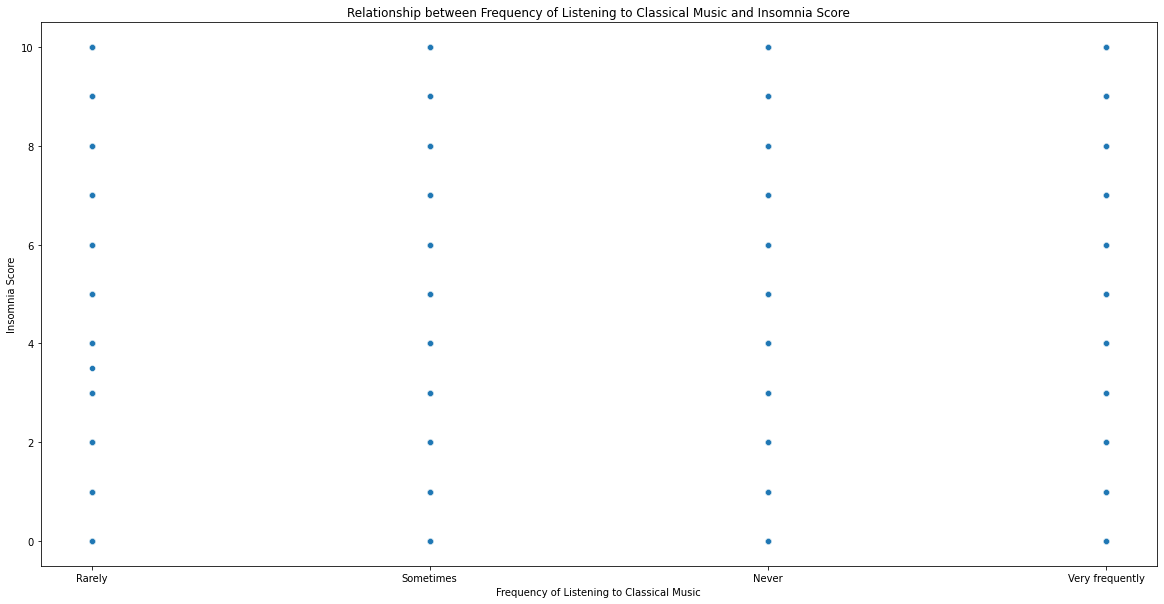

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Frequency [Classical]', y='Insomnia', data=df)
plt.xlabel('Frequency of Listening to Classical Music')
plt.ylabel('Insomnia Score')
plt.title('Relationship between Frequency of Listening to Classical Music and Insomnia Score')
plt.show()

### **Relationship between Frequency of Listening to Classical Music and OCD Score.**

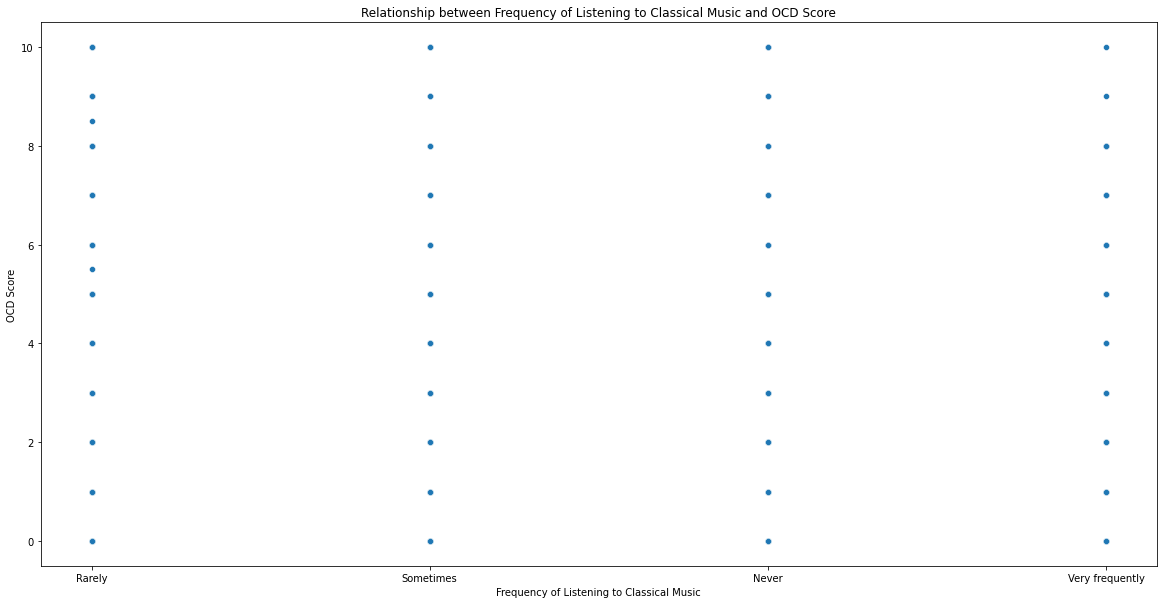

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Frequency [Classical]', y='OCD', data=df)
plt.xlabel('Frequency of Listening to Classical Music')
plt.ylabel('OCD Score')
plt.title('Relationship between Frequency of Listening to Classical Music and OCD Score')
plt.show()

### **Relationship between mental health scores and musical preferences.**

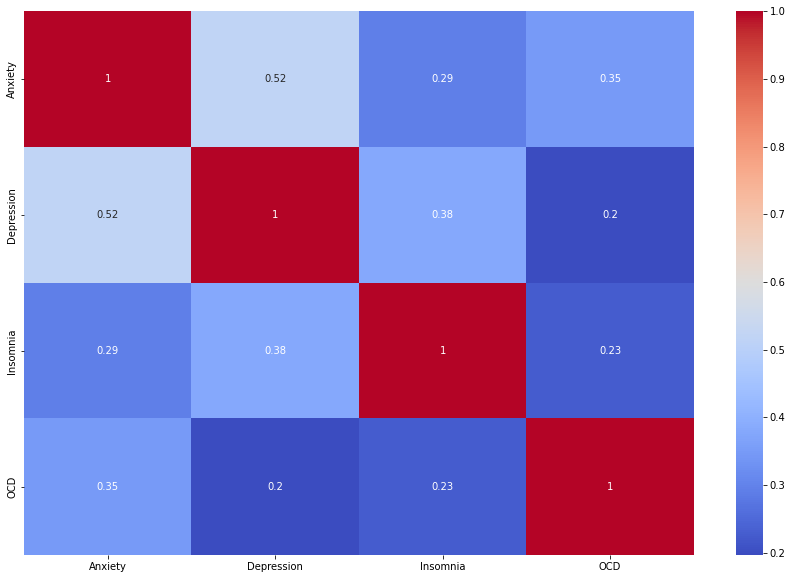

In [ ]:
# Extract the columns for mental health scores and musical preferences
mental_health_scores = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
musical_preferences = ['Fav genre']

# Calculate the correlation matrix for mental health scores and musical preferences
corr = df[mental_health_scores + musical_preferences].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

There is minimum correlation between the mental health score.

### **Relationships between Variables and Mental Health Conditions.**

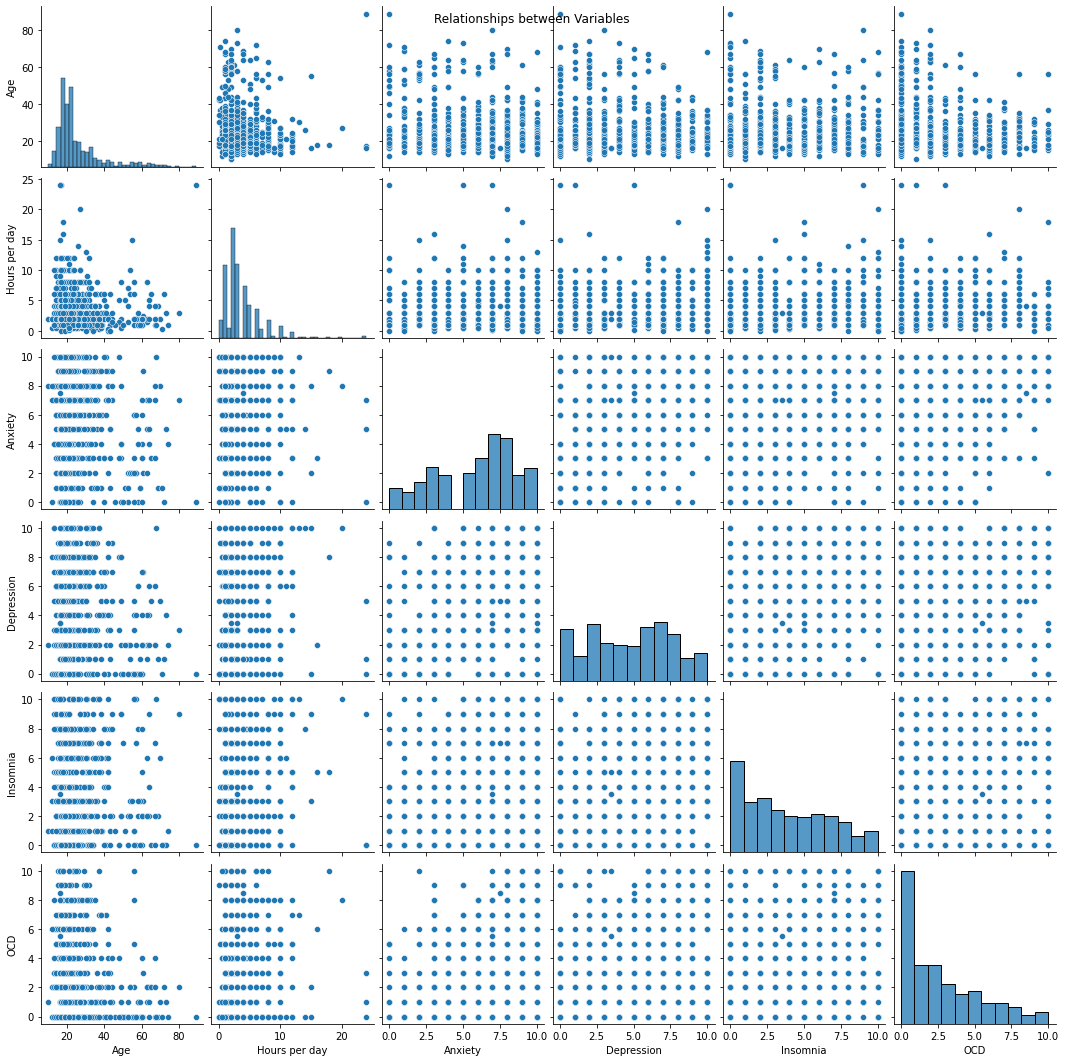

In [ ]:
sns.pairplot(df[['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']])
plt.suptitle('Relationships between Variables')
plt.show()


### **Comparison of Hours per Day Spent on Different Streaming Services.**

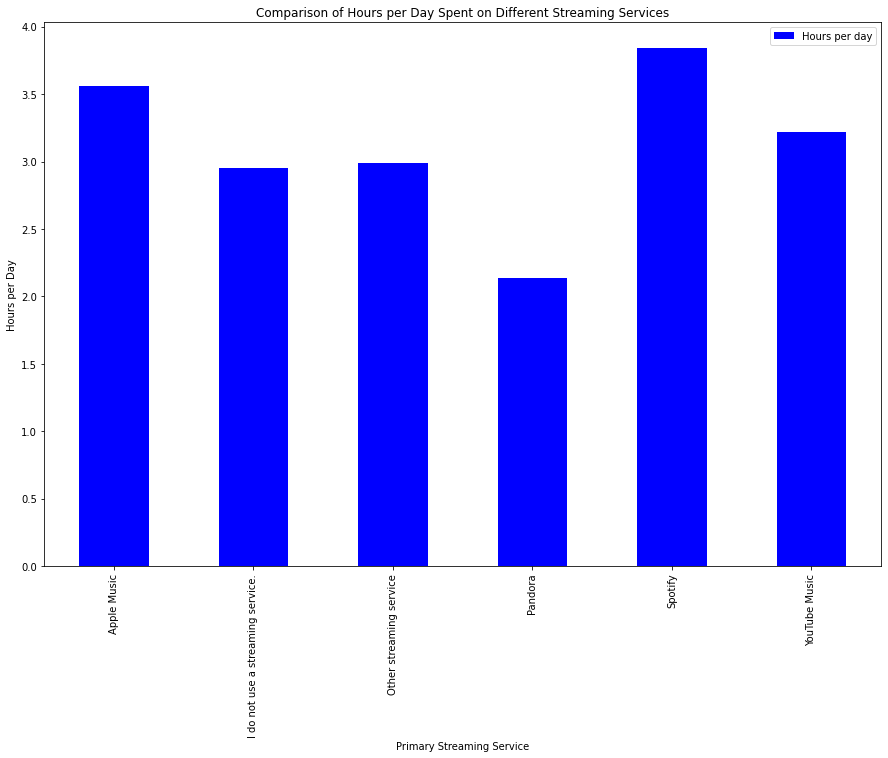

In [ ]:
plt.figure(figsize=(15,10))
df.groupby(['Primary streaming service'])['Hours per day'].mean().plot(kind='bar', color='blue')
plt.xlabel('Primary Streaming Service')
plt.ylabel('Hours per Day')
plt.title('Comparison of Hours per Day Spent on Different Streaming Services')
plt.legend()
plt.show()


Participants spend more time on spotify than all other streaming services.

### **Relationship between Age and Hours per Day Spent Listening to Music.**

In [ ]:
#showing the relationship between age and hours per day spent listening to music:
fig = px.scatter(df, x='Age', y='Hours per day', color='Hours per day', size='Hours per day',
                 color_continuous_scale='magma', title='Relationship between Age and Hours per Day Spent Listening to Music')
fig.show()


Participants aged 40 and below spend a lot of time listening to music.

### **Hours spent listening to music.**

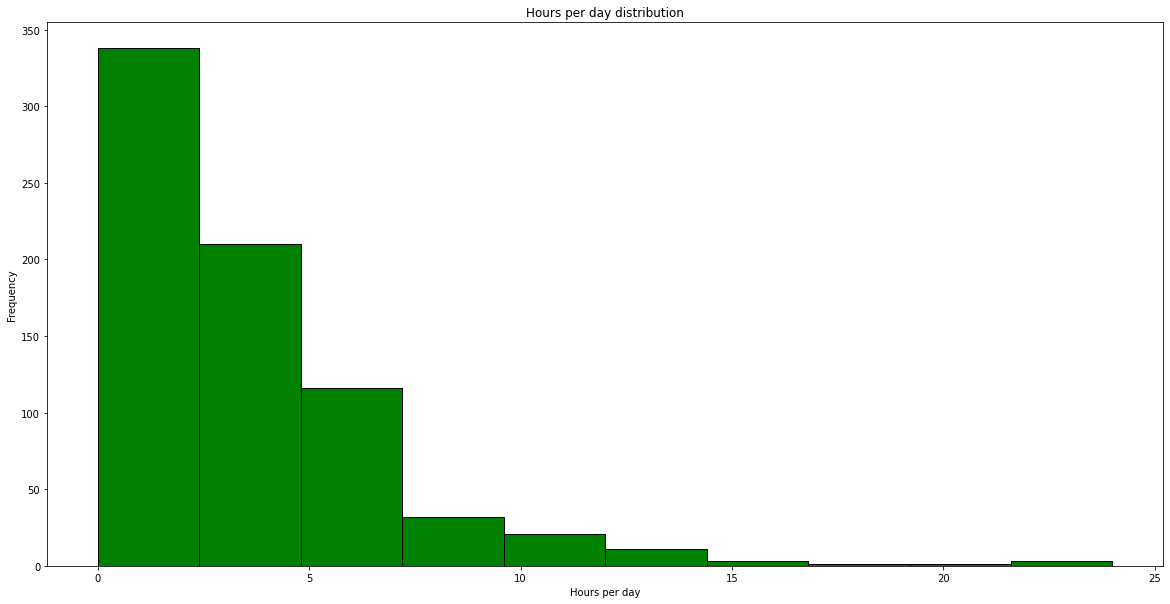

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(df['Hours per day'], bins=10, color='green', edgecolor='black')
plt.title("Hours per day distribution")
plt.xlabel("Hours per day")
plt.ylabel("Frequency")
plt.show()


### **Trend of Anxiety Scores over Time.**

In [ ]:
#showing the trend of anxiety scores over time:
fig = px.line(df, x='Timestamp', y='Anxiety', title='Trend of Anxiety Scores over Time')
fig.show()

The mean, variance, and covariance are constant over time, and there is no underlying trend or seasonality in the data.

This suggests that the anxiety scores are not influenced by external factors such as time, seasonality or trend.

### **Histogram plots of Age and mental health scores.**

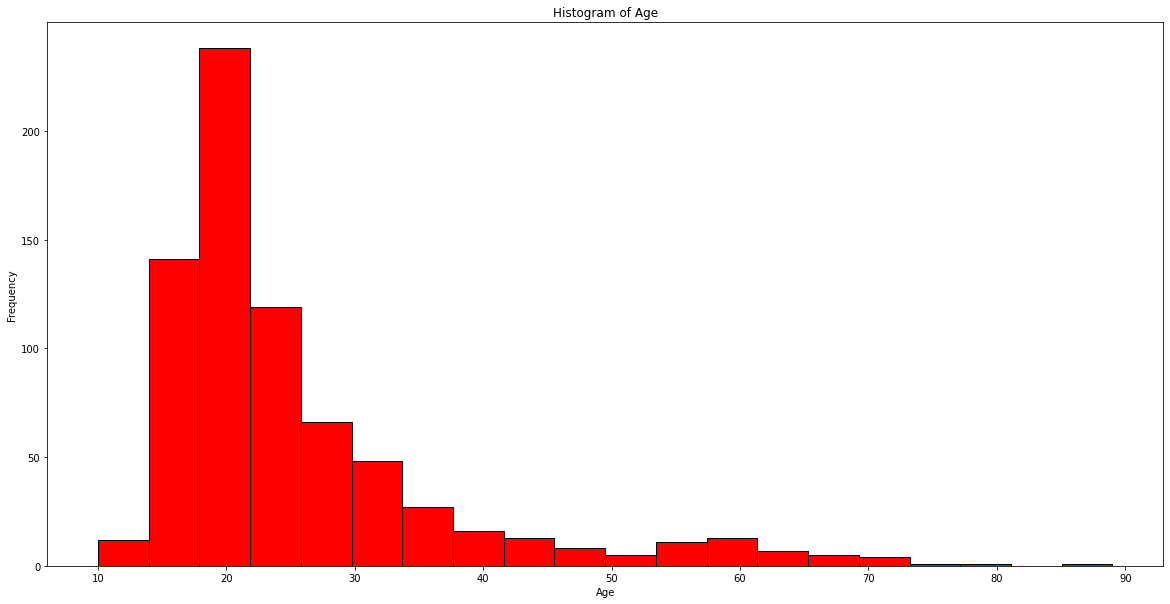

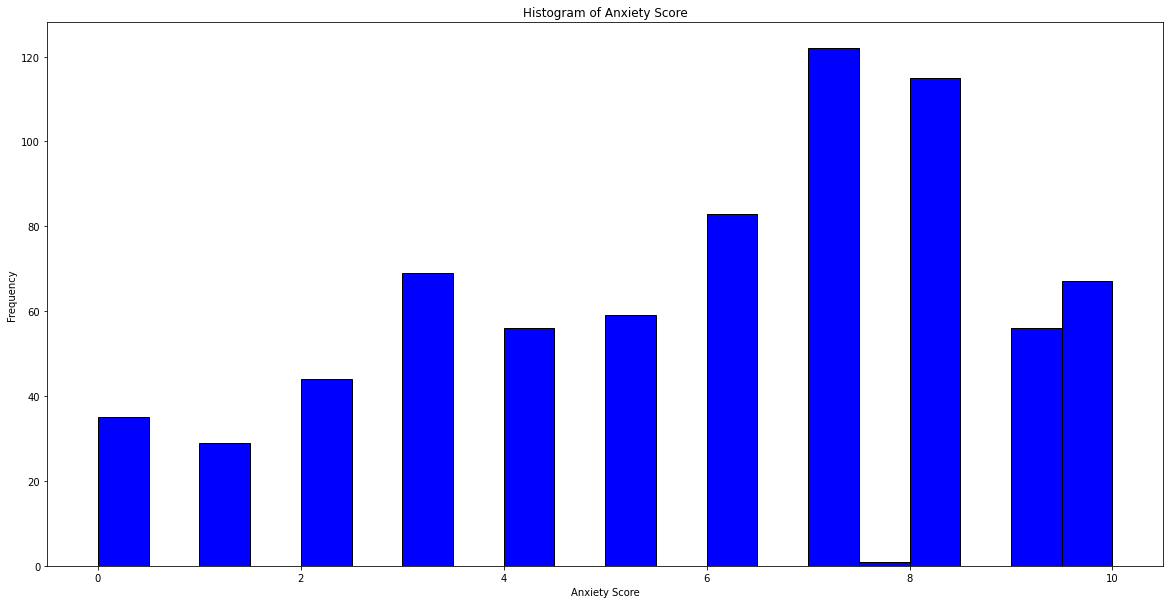

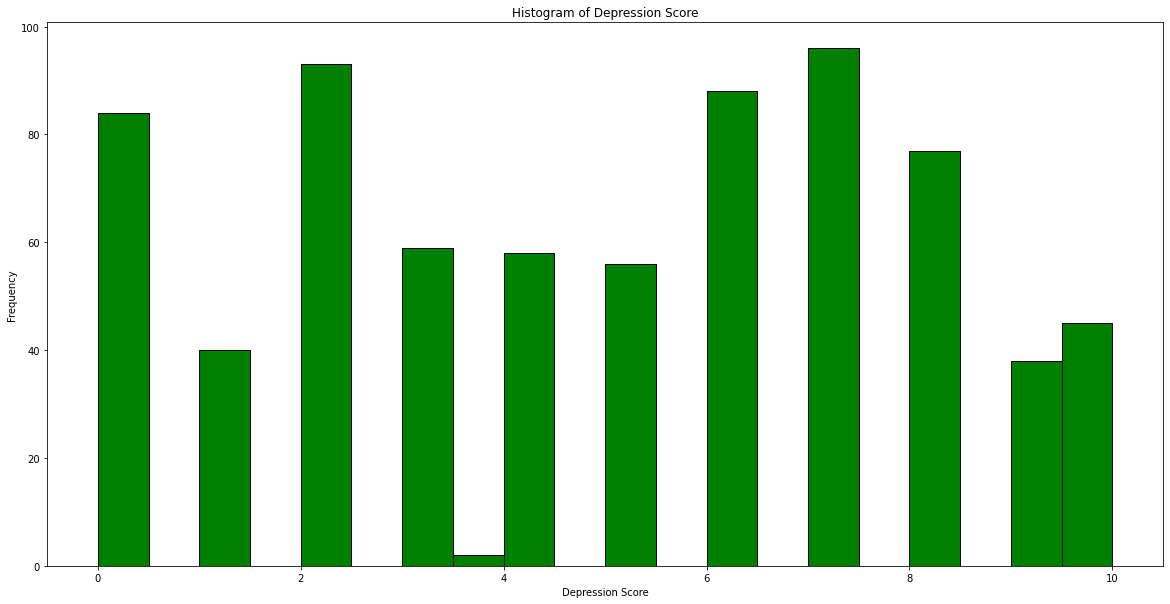

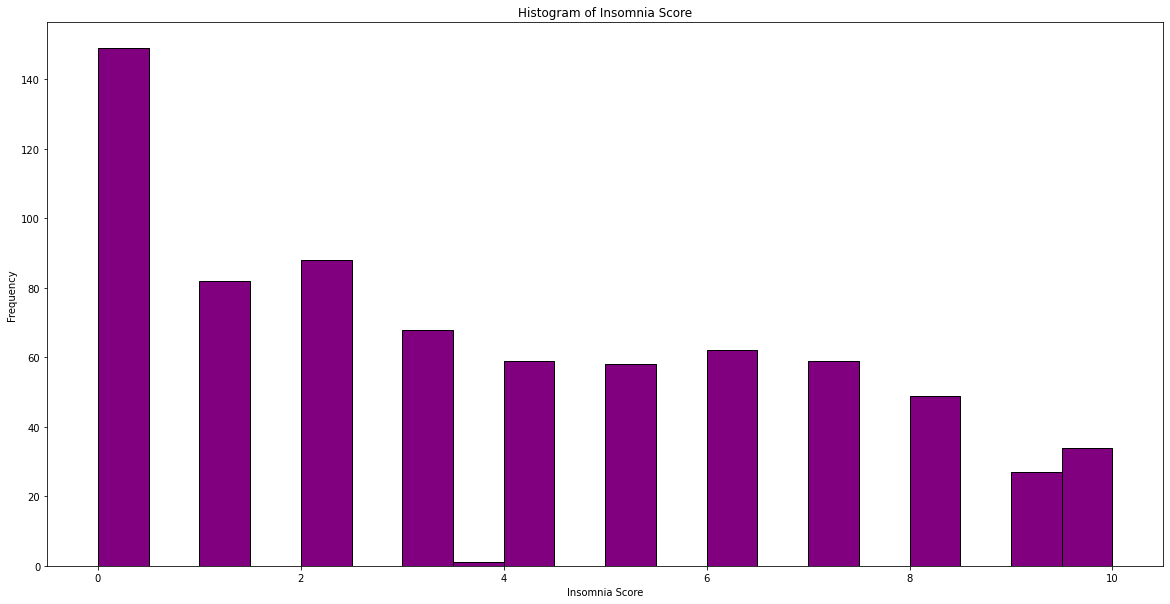

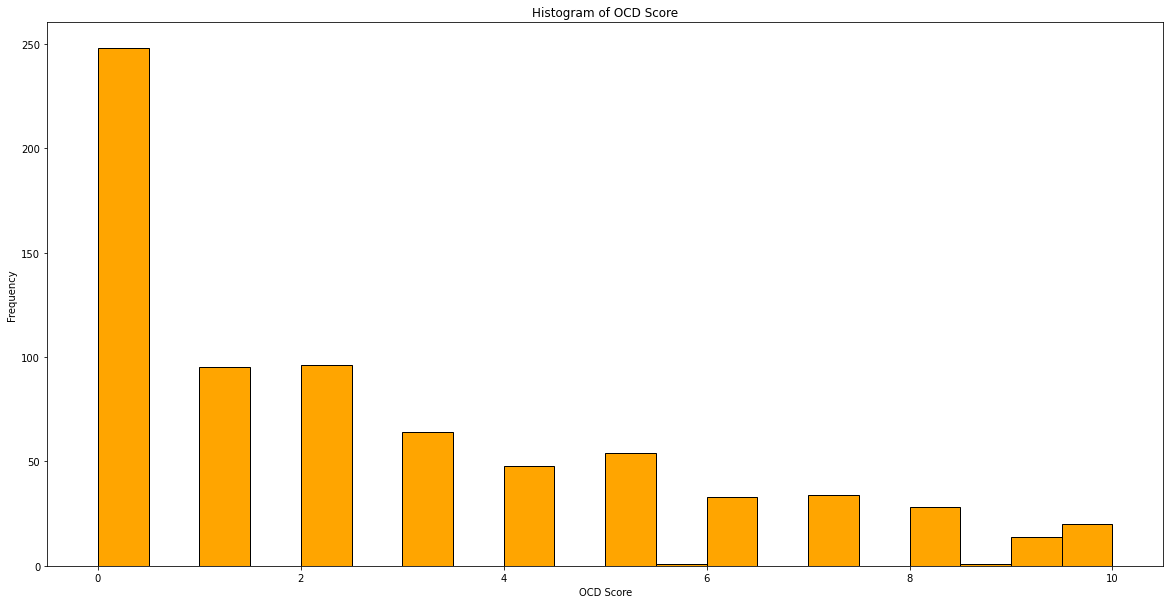

In [ ]:
# Plot histogram of Age
plt.figure(figsize=(20, 10))
plt.hist(df['Age'], bins=20, color='red', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Plot histogram of Anxiety Score
plt.figure(figsize=(20, 10))
plt.hist(df['Anxiety'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Anxiety Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anxiety Score')
plt.show()

# Plot histogram of Depression Score
plt.figure(figsize=(20, 10))
plt.hist(df['Depression'], bins=20, color='green', edgecolor='black')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')
plt.title('Histogram of Depression Score')
plt.show()

# Plot histogram of Insomnia Score
plt.figure(figsize=(20, 10))
plt.hist(df['Insomnia'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Insomnia Score')
plt.ylabel('Frequency')
plt.title('Histogram of Insomnia Score')
plt.show()

# Plot histogram of OCD Score
plt.figure(figsize=(20, 10))
plt.hist(df['OCD'], bins=20, color='orange', edgecolor='black')
plt.xlabel('OCD Score')
plt.ylabel('Frequency')
plt.title('Histogram of OCD Score')
plt.show()


### **Distribution of Mental Health Scores.**

In [ ]:
disorder =  df[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
percentage = [df['Anxiety'].mean(), df['Depression'].mean(), df['Insomnia'].mean(), df['OCD'].mean()]

fig = px.pie(df, values=percentage, names=disorder.columns, title='Distribution of Mental Health Scores')
fig.update_traces(textinfo='percent+label')

fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()


### **Mean Mental Health Scores.**

In [ ]:
#Mean Mental Health Scores
df_mental_health = df[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
mean_values = df_mental_health.mean()

fig = px.bar(mean_values, x=mean_values.index, y=mean_values.values, title='Mean Mental Health Scores')
fig.show()


From the two plots above, anxiety is the highest in the mental health scores of the participants.

### **Age and Favorite Genre.**

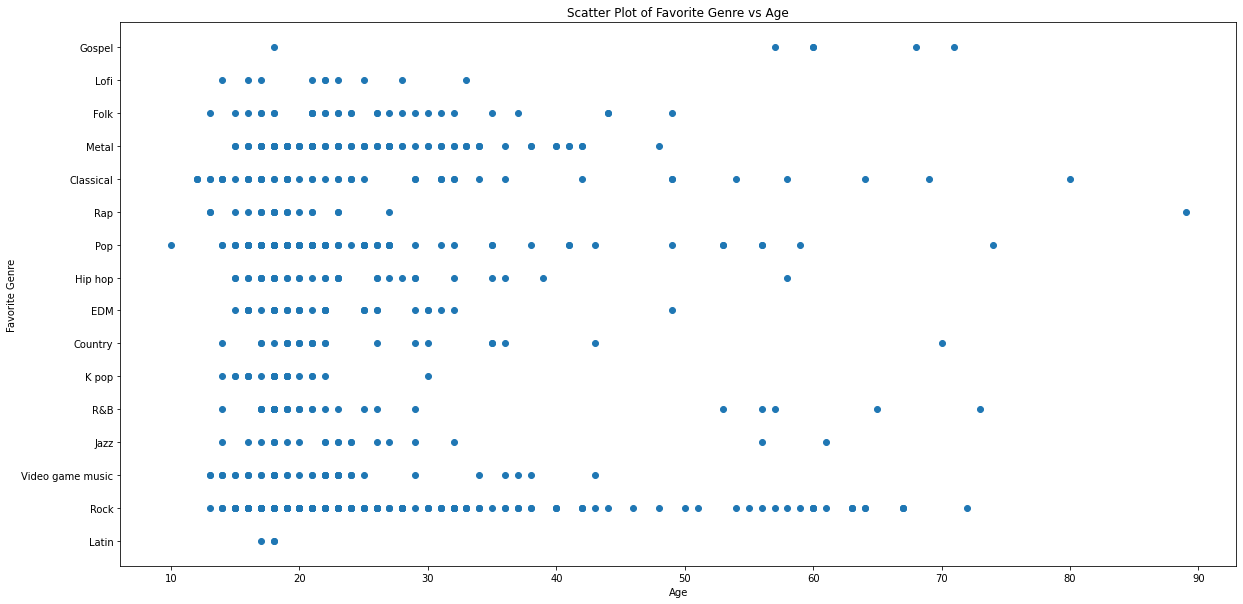

In [ ]:
# Create a scatter plot with age on the x-axis and favorite genre on the y-axis
plt.figure(figsize=(20, 10))
plt.scatter(df["Age"], df["Fav genre"])

# Add labels and title to the plot
plt.xlabel("Age")
plt.ylabel("Favorite Genre")
plt.title("Scatter Plot of Favorite Genre vs Age")

# Show the plot
plt.show()

Rap, R&B, EDM, K Pop, Jazz are listened to by the younger generation.

Rock music is listened to by all age groups.

Gospel music is the least listened to.

### **Relationship between Fav genre and Mental Health Scores.**

<Figure size 1440x720 with 0 Axes>

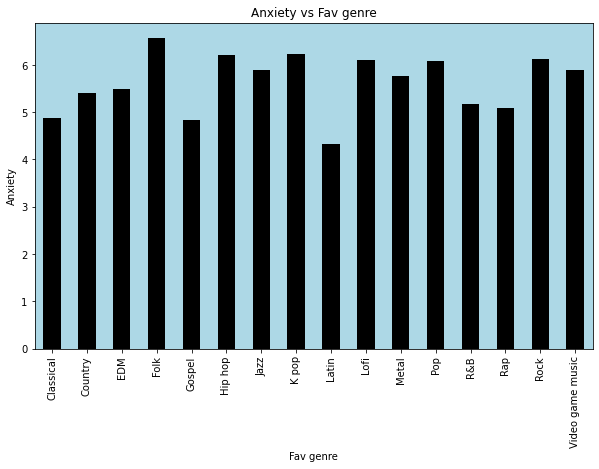

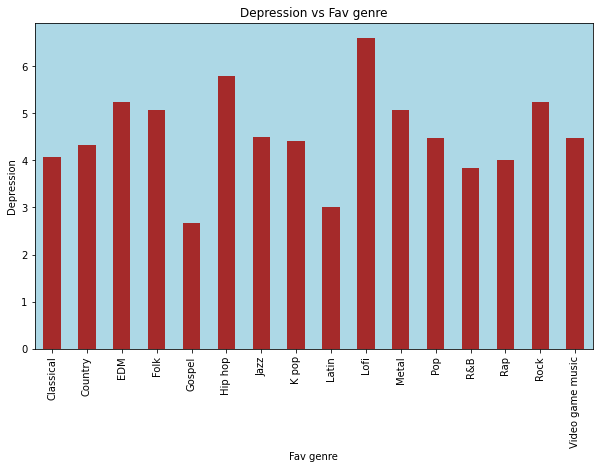

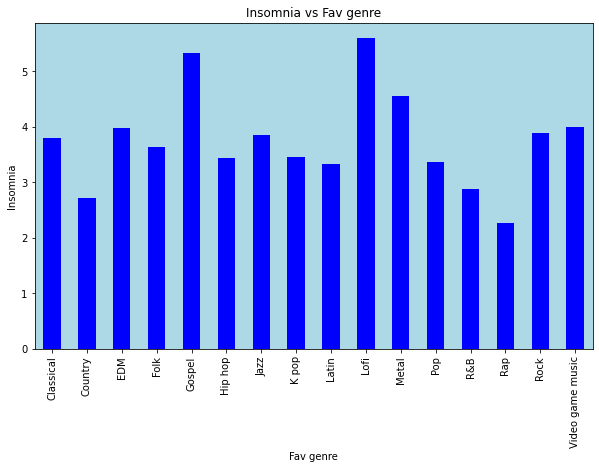

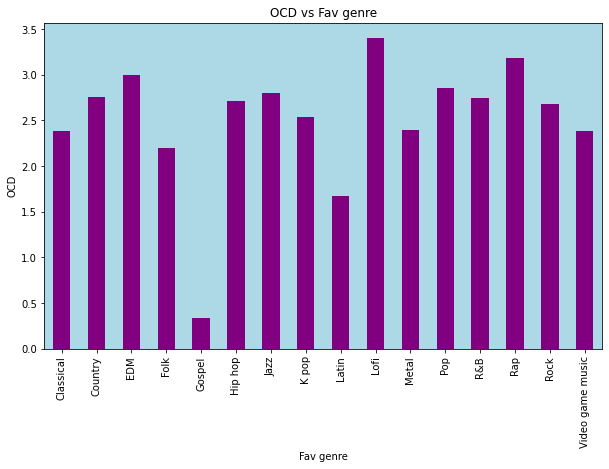

In [ ]:
# Create a list of mental health scores
scores = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
# Plot each mental health score against the favorite genre
plt.figure(figsize=(20, 10))
#ax.set_facecolor('lightblue')

colors = ['black', 'brown', 'blue', 'purple']

for i, score in enumerate(scores):
    fig, ax = plt.subplots()
    df.groupby('Fav genre')[score].mean().plot(kind='bar', ax=ax, color=colors[i])
    ax.set_xlabel("Fav genre")
    ax.set_ylabel(score)
    ax.set_title(f"{score} vs Fav genre")
    fig.set_size_inches(10, 6)
    ax.set_facecolor('lightblue')


# **Model Development**

# **Model Evaluation.**

# **Model Validation.**

# **References:**

1. A comprehensive guide for data analysis in Excel: [Link](https://www.analyticsvidhya.com/blog/2021/11/a-comprehensive-guide-on-microsoft-excel-for-data-analysis/)

2. How to tell a data story: [Link](https://www.youtube.com/watch?v=BXKmpo08tFc&list=PLBxnDgPDW3LrSNAF_j_hr7FS-tkD3fSxW&index=8)

3. A beginners guide to data visualization in Python: [Link](https://towardsdatascience.com/a-beginners-guide-to-data-analysis-in-python-188706df5447)

4. Python for data analytics: [Video Tutorial](https://www.youtube.com/watch?v=0ihhPxzumL0&list=PLBxnDgPDW3LrSNAF_j_hr7FS-tkD3fSxW&index=11)